### Importing required libraries


In [17]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np


### Game Settings

In [18]:

NUM_PLAYERS = 12
MAFIA_RATIO = 0.3 
MAFIA_COUNT = int(NUM_PLAYERS * MAFIA_RATIO)
ROLES = ["Mafia", "Villager", "Police", "Doctor"]
ACTIONS = ["accuse", "defend", "claim","vote"]

def assign_roles(num_players, mafia_count):
    roles = ['Mafia'] * mafia_count + ['Police', 'Doctor'] # one doctor and one police
    roles += ['Villager'] * (num_players - len(roles))
    random.shuffle(roles)
    return roles

# Initalise roles
roles = assign_roles(NUM_PLAYERS, MAFIA_COUNT)
players = [{"id": i, "role": roles[i], "history": [], "alive": True} for i in range(NUM_PLAYERS)]
alive_players = players.copy()

def print_roles(players):
    for p in players:
        print(f"Player {p['id']}: {p['role']}")

# roles assigned (for debugging or only known to the god)
print("Roles (Hidden from AI Observer):")
print_roles(players)


Roles (Hidden from AI Observer):
Player 0: Villager
Player 1: Mafia
Player 2: Mafia
Player 3: Mafia
Player 4: Villager
Player 5: Villager
Player 6: Villager
Player 7: Police
Player 8: Villager
Player 9: Villager
Player 10: Villager
Player 11: Doctor


Assigned Roles (Hidden from AI):
Player 0 - Mafia
Player 1 - Villager
Player 2 - Police
Player 3 - Villager
Player 4 - Doctor
Player 5 - Villager
Player 6 - Mafia
Player 7 - Villager
Player 8 - Villager
Player 9 - Mafia
Player 10 - Villager
Player 11 - Villager

 Night 1
 Police checked Player 6: Mafia (private)
 Player 7 was killed last night.

Day 1
 Voting:
Player 0 voted for Player 4
Player 1 voted for Player 5
Player 2 voted for Player 9
Player 3 voted for Player 4
Player 4 voted for Player 9
Player 5 voted for Player 6
Player 6 voted for Player 3
Player 8 voted for Player 10
Player 9 voted for Player 6
Player 10 voted for Player 9
Player 11 voted for Player 10


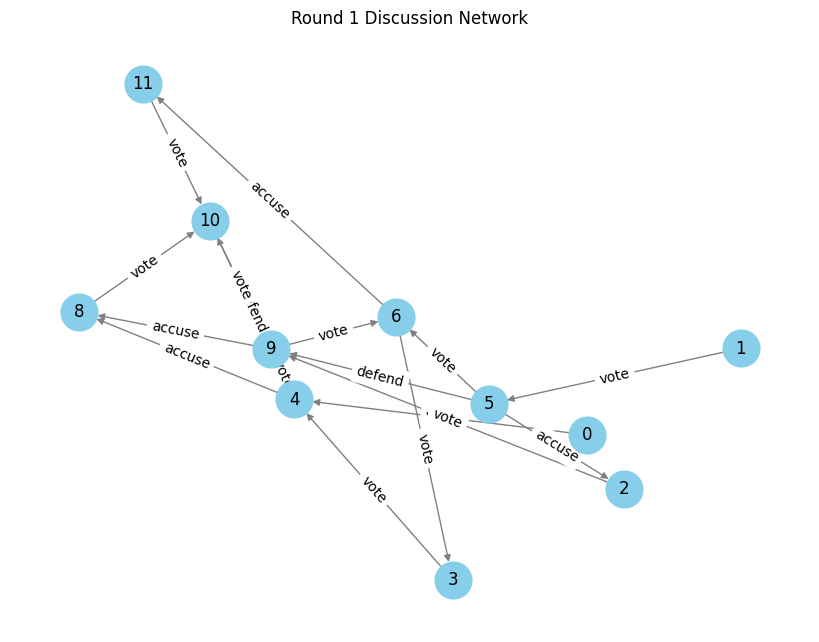


 Night 2
 Police checked Player 10: Villager (private)
 Player 4 was killed last night.

Day 2
 Voting:
Player 0 voted for Player 11
Player 1 voted for Player 0
Player 2 voted for Player 9
Player 3 voted for Player 11
Player 5 voted for Player 6
Player 6 voted for Player 9
Player 8 voted for Player 6
Player 9 voted for Player 2
Player 10 voted for Player 6
Player 11 voted for Player 6


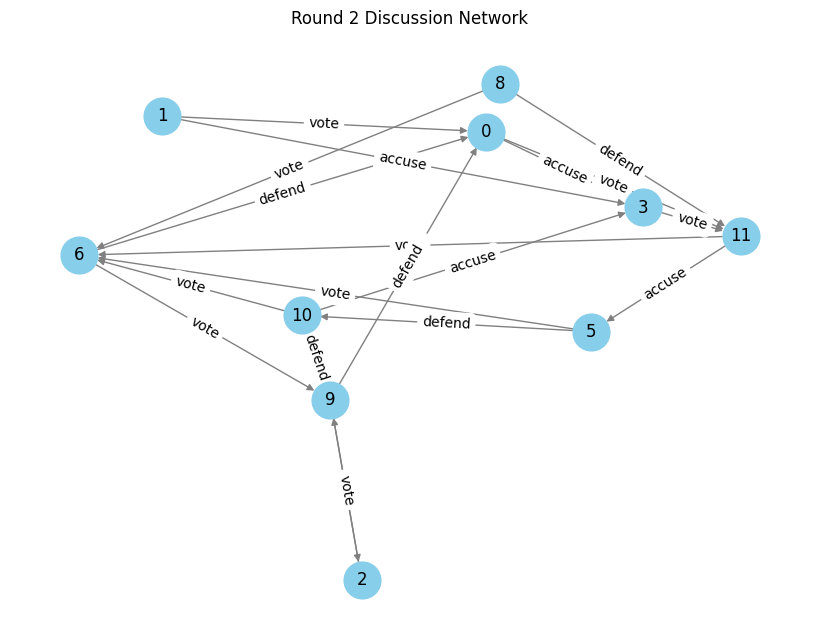


 Night 3
 Police checked Player 6: Mafia (private)
 Player 1 was killed last night.

Day 3
 Voting:
Player 0 voted for Player 10
Player 2 voted for Player 0
Player 3 voted for Player 2
Player 5 voted for Player 11
Player 6 voted for Player 9
Player 8 voted for Player 2
Player 9 voted for Player 6
Player 10 voted for Player 6
Player 11 voted for Player 0


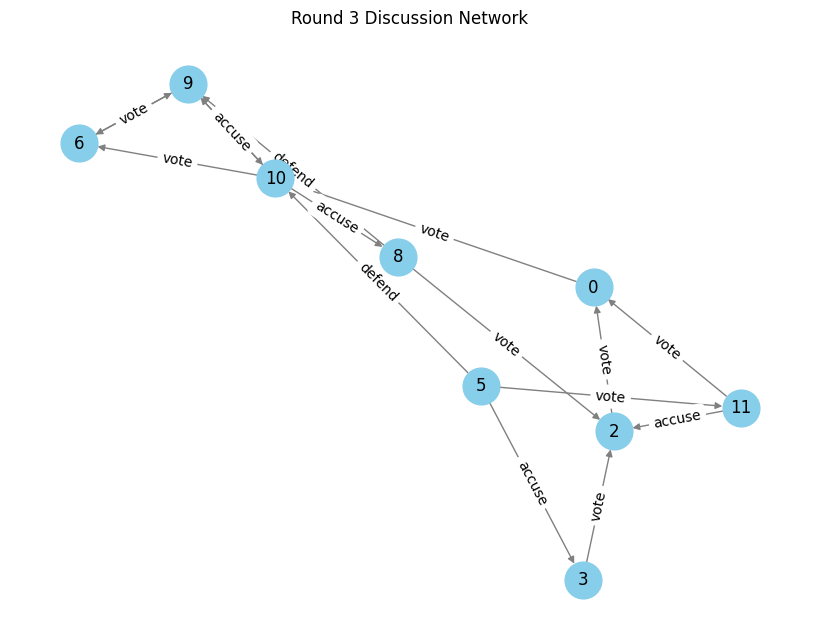


 Night 4
 Police checked Player 11: Villager (private)
 Player 3 was killed last night.

Day 4
 Voting:
Player 0 voted for Player 9
Player 2 voted for Player 11
Player 5 voted for Player 10
Player 6 voted for Player 2
Player 8 voted for Player 0
Player 9 voted for Player 6
Player 10 voted for Player 5
Player 11 voted for Player 6


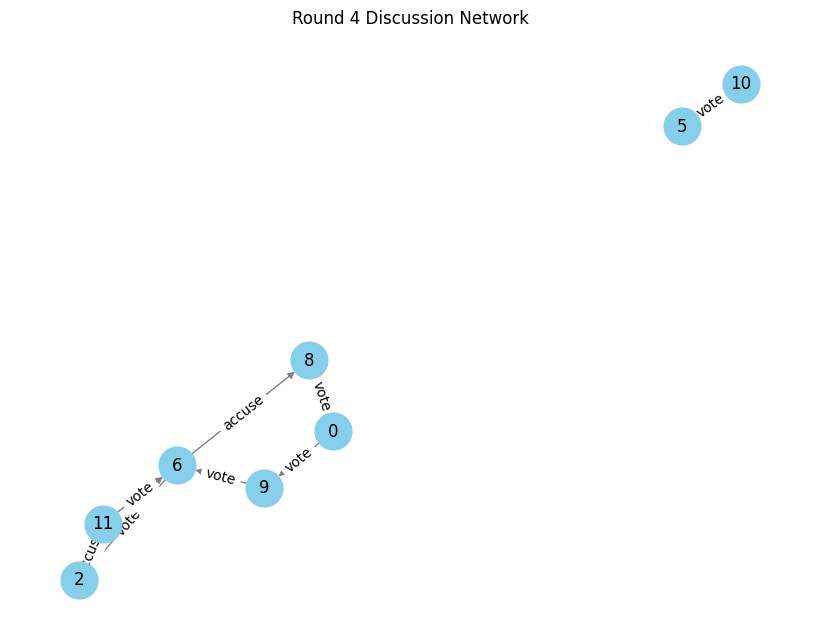


 Night 5
 Police checked Player 8: Villager (private)
 Player 5 was killed last night.

Day 5
 Voting:
Player 0 voted for Player 2
Player 2 voted for Player 9
Player 6 voted for Player 10
Player 8 voted for Player 0
Player 9 voted for Player 10
Player 10 voted for Player 9
Player 11 voted for Player 0


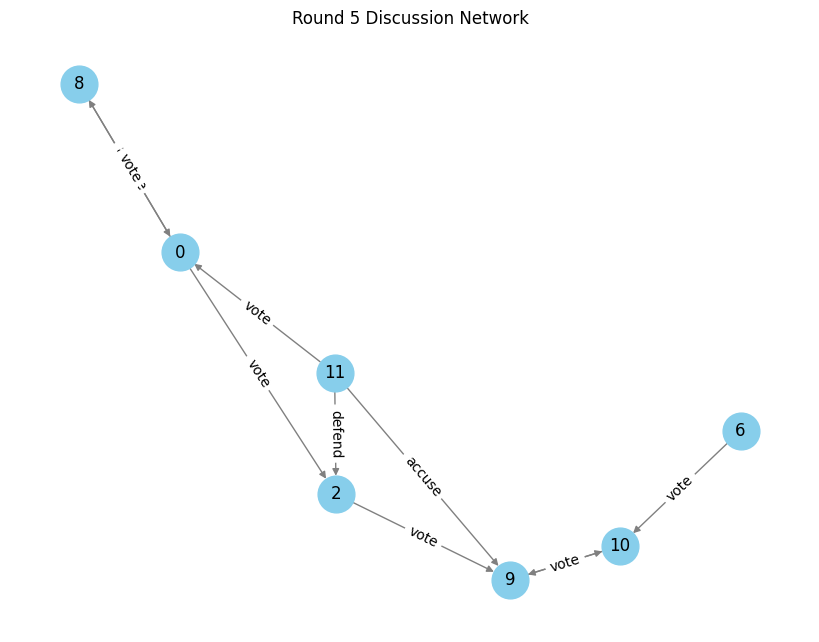


 Night 6
 Police checked Player 8: Villager (private)
 Player 8 was killed last night.

Day 6
 Voting:
Player 0 voted for Player 10
Player 2 voted for Player 0
Player 6 voted for Player 2
Player 9 voted for Player 2
Player 10 voted for Player 9
Player 11 voted for Player 6


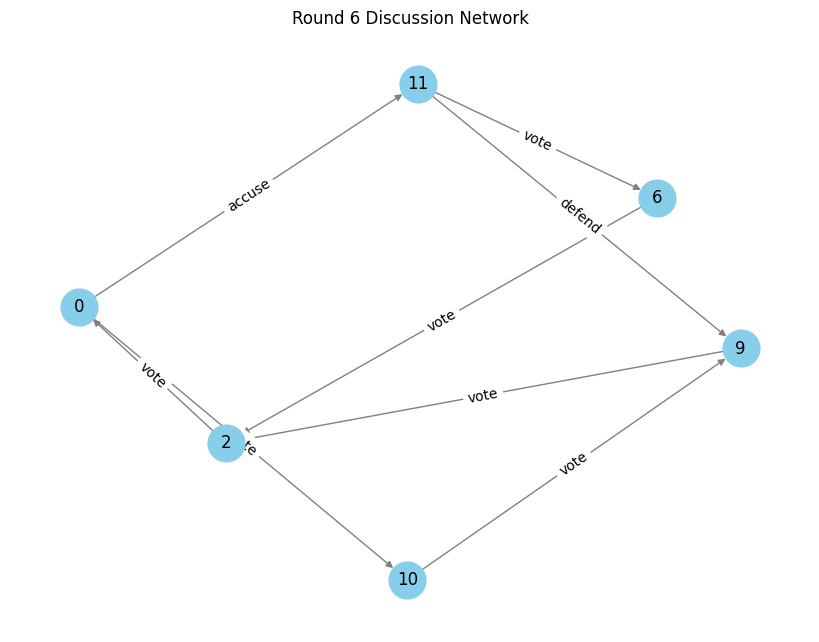

 Mafia have taken over! Mafia win.


In [19]:

# Game setup
NUM_PLAYERS = 12
MAFIA_RATIO = 0.3
MAFIA_COUNT = int(NUM_PLAYERS * MAFIA_RATIO)

ROLES = ["Mafia", "Villager", "Police", "Doctor"]
ACTIONS = ["accuse", "defend", "claim", "vote"]

# Assign Roles
def assign_roles(num_players, mafia_count):
    roles = ['Mafia'] * mafia_count + ['Police', 'Doctor']
    roles += ['Villager'] * (num_players - len(roles))
    random.shuffle(roles)
    return roles

roles = assign_roles(NUM_PLAYERS, MAFIA_COUNT)
players = [{"id": i, "role": roles[i], "alive": True, "history": []} for i in range(NUM_PLAYERS)]

# Helper Functions
def get_alive_players():
    return [p for p in players if p['alive']]

def get_player_by_id(pid):
    return next((p for p in players if p["id"] == pid), None)

def choose_random_alive(exclude_ids=[]):
    choices = [p for p in get_alive_players() if p["id"] not in exclude_ids]
    return random.choice(choices)["id"] if choices else None

def count_roles():
    alive = get_alive_players()
    role_count = Counter([p["role"] for p in alive])
    return role_count

# Print roles (for God view/debug)
print("Assigned Roles (Hidden from AI):")
for p in players:
    print(f"Player {p['id']} - {p['role']}")

# Storage
round_logs = []
G = nx.DiGraph()

# Game Loop
round_number = 1
while True:
    print(f"\n Night {round_number}")
    alive = get_alive_players()
    alive_ids = [p["id"] for p in alive]

    mafia_ids = [p["id"] for p in alive if p["role"] == "Mafia"]
    doctor_id = next((p["id"] for p in alive if p["role"] == "Doctor"), None)
    police_id = next((p["id"] for p in alive if p["role"] == "Police"), None)


    # Mafia chooses a victim
    potential_victims = [pid for pid in alive_ids if pid not in mafia_ids]
    target_id = random.choice(potential_victims) if potential_victims else None

    # Doctor chooses someone to save
    save_id = choose_random_alive() if doctor_id else None

    # Police investigates
    investigated_id = choose_random_alive([police_id]) if police_id else None
    if investigated_id is not None:
        investigated_player = get_player_by_id(investigated_id)
        print(f" Police checked Player {investigated_id}: {investigated_player['role']} (private)")

    # Resolve death
    night_death = None
    if target_id is not None and target_id != save_id:
        victim = get_player_by_id(target_id)
        victim["alive"] = False
        night_death = target_id
        print(f" Player {target_id} was killed last night.")

    else:
        print(" No one died last night.")

    print(f"\nDay {round_number}")
    day_log = []
    G.clear()

    alive = get_alive_players()
    alive_ids = [p["id"] for p in alive]

    for p in alive:
        action = {}
        actor_id = p["id"]
        G.add_node(actor_id)

        # Weighted random actions
        if p["role"] == "Mafia":
            if random.random() < 0.6:
                target = choose_random_alive([actor_id] + mafia_ids)
                if target:
                    action = {"type": "accuse", "actor": actor_id, "target": target}
                    G.add_edge(actor_id, target, label="accuse")
            elif random.random() < 0.4:
                ally = random.choice(mafia_ids)
                if ally != actor_id and get_player_by_id(ally)["alive"]:
                    action = {"type": "defend", "actor": actor_id, "target": ally}
                    G.add_edge(actor_id, ally, label="defend")
        else:
            if random.random() < 0.4:
                target = choose_random_alive([actor_id])
                if target:
                    action = {"type": "accuse", "actor": actor_id, "target": target}
                    G.add_edge(actor_id, target, label="accuse")
            if random.random() < 0.3:
                target = choose_random_alive([actor_id])
                if target:
                    action = {"type": "defend", "actor": actor_id, "target": target}
                    G.add_edge(actor_id, target, label="defend")
            if random.random() < 0.1:
                claim_role = random.choice(["Doctor", "Police"])
                action = {"type": "claim", "actor": actor_id, "role": claim_role}
        
        if action:
            day_log.append(action)

    # Voting Phase
    print(" Voting:")
    vote_counts = Counter()
    for p in alive:
        voter = p["id"]
        vote_target = choose_random_alive([voter])
        vote_counts[vote_target] += 1
        day_log.append({"type": "vote", "actor": voter, "target": vote_target})
        print(f"Player {voter} voted for Player {vote_target}")
        G.add_edge(voter, vote_target, label="vote")

    # Eliminate player with majority
    if vote_counts:
        most_votes = vote_counts.most_common(1)[0]
        target_id, count = most_votes
        if count > len(alive_ids) // 2:
            eliminated = get_player_by_id(target_id)
            eliminated["alive"] = False
            print(f"Player {target_id} eliminated by vote.")

    # Store logs
    round_logs.append(day_log)

    # Draw graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=700)
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Round {round_number} Discussion Network")
    plt.show()

    # Check for game end
    current_roles = count_roles()
    mafia_left = current_roles.get("Mafia", 0)
    villagers_left = sum([v for k, v in current_roles.items() if k != "Mafia"])

    if mafia_left == 0:
        print(" All Mafia have been eliminated! Villagers win.")
        break
    elif mafia_left >= villagers_left:
        print(" Mafia have taken over! Mafia win.")
        break

    round_number += 1


 Assigned Roles (Hidden from AI):
Player 0: Villager
Player 1: Villager
Player 2: Villager
Player 3: Doctor
Player 4: Mafia
Player 5: Police
Player 6: Villager
Player 7: Mafia
Player 8: Villager
Player 9: Mafia
Player 10: Villager
Player 11: Villager

 NIGHT 1
 Police privately investigates Player 9: Mafia
 Doctor privately attempts to save Player 10
 Player 5 was killed by Mafia.

 DAY 1
 Police (Player 5) claims and accuses Player 9
 Villager Player 2 defends Player 8
 Doctor Player 3 defends Player 6
 Mafia Player 4 accuses Player 11
 Mafia Player 7 accuses Player 2
 Villager Player 8 defends Player 4
 Mafia Player 9 defends Player 7
 Villager Player 10 defends Player 0
 Villager Player 11 accuses Player 1

 Voting Phase
 Player 0 voted for Player 10
 Player 1 voted for Player 10
 Player 2 voted for Player 6
 Player 3 voted for Player 1
 Player 4 voted for Player 10
 Player 6 voted for Player 4
 Player 7 voted for Player 11
 Player 8 voted for Player 9
 Player 9 voted for Player 11


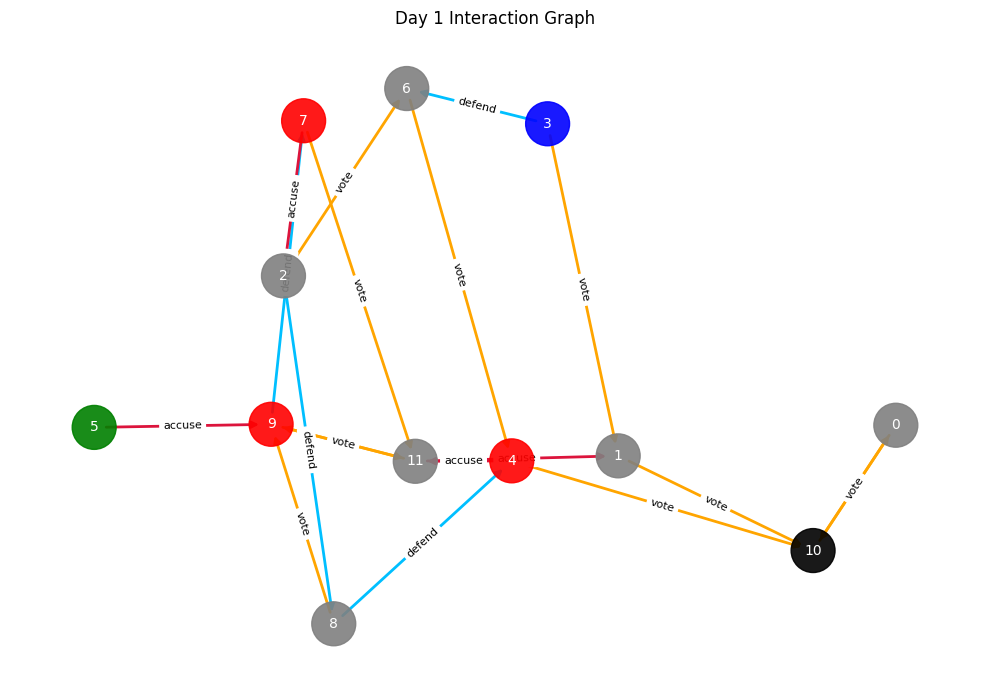


 NIGHT 2
 Doctor privately attempts to save Player 2
 Player 6 was killed by Mafia.

 DAY 2
 Villager Player 1 accuses Player 4
 Doctor Player 3 defends Player 4
 Villager Player 8 defends Player 4

 Voting Phase
 Player 0 voted for Player 4
 Player 1 voted for Player 7
 Player 2 voted for Player 0
 Player 3 voted for Player 1
 Player 4 voted for Player 11
 Player 7 voted for Player 8
 Player 8 voted for Player 1
 Player 9 voted for Player 4
 Player 11 voted for Player 1
 Player 1 is eliminated by vote.


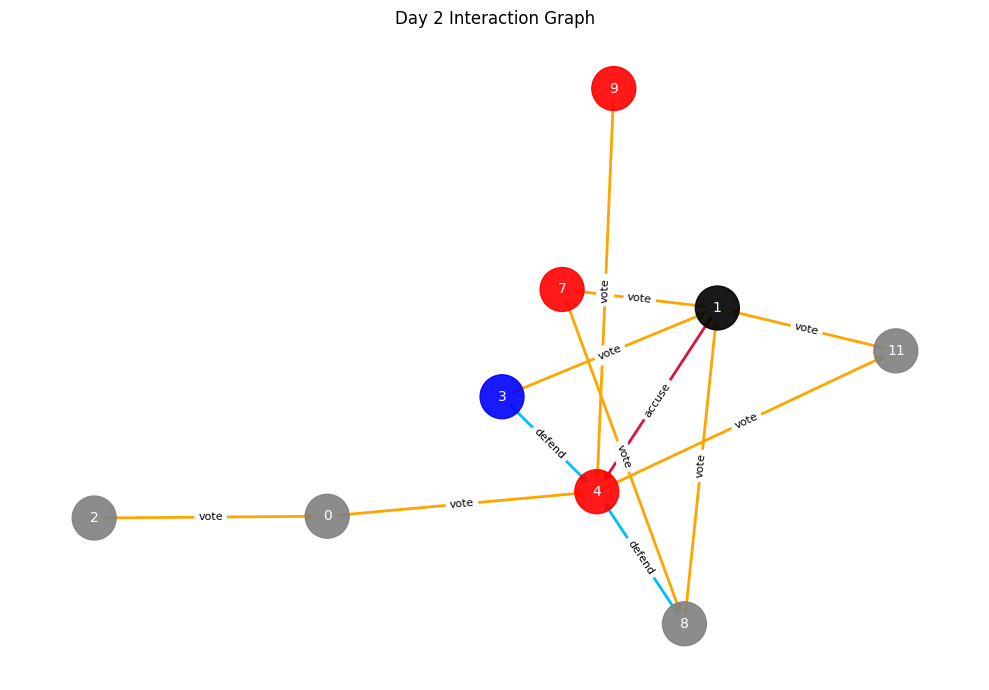


 NIGHT 3
 Doctor privately attempts to save Player 0
 Player 3 was killed by Mafia.

 DAY 3
 Mafia Player 4 accuses Player 2
 Mafia Player 7 accuses Player 11
 Mafia Player 9 defends Player 4
 Villager Player 11 accuses Player 7

 Voting Phase
 Player 0 voted for Player 11
 Player 2 voted for Player 0
 Player 4 voted for Player 7
 Player 7 voted for Player 0
 Player 8 voted for Player 2
 Player 9 voted for Player 8
 Player 11 voted for Player 0
 Player 0 is eliminated by vote.


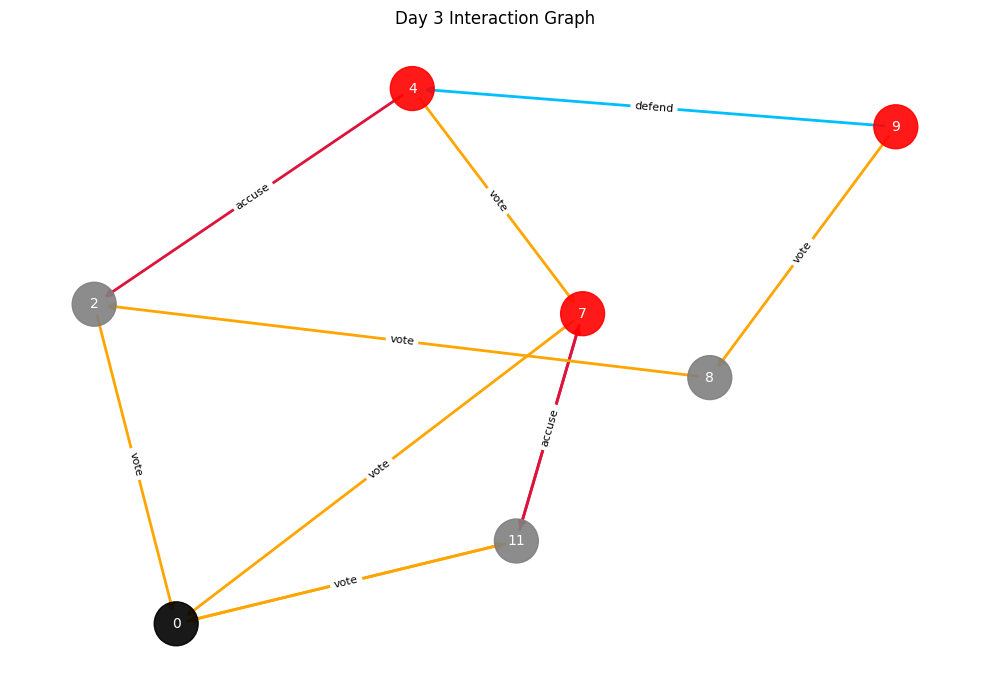


 Mafia outnumber villagers. Mafia win!


In [24]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Setup
NUM_PLAYERS = 12
MAFIA_RATIO = 0.3
MAFIA_COUNT = int(NUM_PLAYERS * MAFIA_RATIO)

# Role assignment
def assign_roles(n, m):
    roles = ['Mafia'] * m + ['Doctor', 'Police']
    roles += ['Villager'] * (n - len(roles))
    random.shuffle(roles)
    return roles

roles = assign_roles(NUM_PLAYERS, MAFIA_COUNT)
players = [{"id": i, "role": roles[i], "alive": True} for i in range(NUM_PLAYERS)]
G = nx.DiGraph()
round_logs = []

def get_alive():
    return [p for p in players if p["alive"]]

def get_alive_ids():
    return [p["id"] for p in get_alive()]

def get_by_id(pid):
    return next(p for p in players if p["id"] == pid)

def choose_alive(exclude=[]):
    choices = [p["id"] for p in get_alive() if p["id"] not in exclude]
    return random.choice(choices) if choices else None

def count_roles():
    return Counter([p["role"] for p in get_alive()])

def plot_graph(G, roles, eliminated=None, round_num=1):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=round_num)

    node_colors = []
    for node in G.nodes():
        role = roles[node]
        if node == eliminated:
            node_colors.append("black")
        elif role == "Mafia":
            node_colors.append("red")
        elif role == "Doctor":
            node_colors.append("blue")
        elif role == "Police":
            node_colors.append("green")
        else:
            node_colors.append("gray")

    edge_colors = []
    edge_labels = {}
    for u, v, d in G.edges(data=True):
        label = d.get("label", "")
        if label == "vote":
            edge_colors.append("orange")
        elif label == "accuse":
            edge_colors.append("crimson")
        elif label == "defend":
            edge_colors.append("deepskyblue")
        elif label == "claim":
            edge_colors.append("purple")
        else:
            edge_colors.append("black")
        edge_labels[(u, v)] = label

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True, width=2)
    nx.draw_networkx_labels(G, pos, font_color="white", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="black", font_size=8)

    plt.title(f"Day {round_num} Interaction Graph")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Debug: Role Reveal
print(" Assigned Roles (Hidden from AI):")
for p in players:
    print(f"Player {p['id']}: {p['role']}")

# Simulation Loop
round_number = 1
while True:
    alive = get_alive()
    alive_ids = get_alive_ids()
    mafia_ids = [p["id"] for p in alive if p["role"] == "Mafia"]
    police_id = next((p["id"] for p in alive if p["role"] == "Police"), None)
    doctor_id = next((p["id"] for p in alive if p["role"] == "Doctor"), None)

    print(f"\n NIGHT {round_number}")
    # Night Actions
    potential_targets = [pid for pid in alive_ids if pid not in mafia_ids]
    target_id = random.choice(potential_targets) if potential_targets else None
    save_id = choose_alive() if doctor_id is not None else None
    investigated_id = choose_alive([police_id]) if police_id is not None else None

    if investigated_id is not None:
        inv_role = get_by_id(investigated_id)["role"]
        print(f" Police privately investigates Player {investigated_id}: {inv_role}")
    if doctor_id is not None:
        print(f" Doctor privately attempts to save Player {save_id}")

    night_death = None
    if target_id is not None and target_id != save_id:
        get_by_id(target_id)["alive"] = False
        night_death = target_id
        print(f" Player {target_id} was killed by Mafia.")
    else:
        print(" No one died last night.")

    print(f"\n DAY {round_number}")
    G.clear()
    day_log = []
    alive = get_alive()
    alive_ids = get_alive_ids()

    police_claimed = False
    if police_id is not None and investigated_id is not None:
        role = get_by_id(investigated_id)["role"]
        if role == "Mafia" and random.random() < 0.9:
            police_claimed = True
            print(f" Police (Player {police_id}) claims and accuses Player {investigated_id}")
            G.add_edge(police_id, investigated_id, label="accuse")
            day_log.append({"type": "claim", "actor": police_id, "role": "Police"})
            day_log.append({"type": "accuse", "actor": police_id, "target": investigated_id})
        elif role != "Mafia" and random.random() < 0.3:
            G.add_edge(police_id, investigated_id, label="defend")
            print(f" Police (Player {police_id}) defends Player {investigated_id}")
            day_log.append({"type": "defend", "actor": police_id, "target": investigated_id})

    for p in alive:
        pid = p["id"]
        if pid == police_id and police_claimed:
            continue
        if p["role"] == "Mafia":
            if random.random() < 0.6:
                tgt = choose_alive([pid] + mafia_ids)
                if tgt:
                    G.add_edge(pid, tgt, label="accuse")
                    day_log.append({"type": "accuse", "actor": pid, "target": tgt})
                    print(f" Mafia Player {pid} accuses Player {tgt}")
            elif random.random() < 0.3:
                ally = random.choice(mafia_ids)
                if ally != pid and get_by_id(ally)["alive"]:
                    G.add_edge(pid, ally, label="defend")
                    day_log.append({"type": "defend", "actor": pid, "target": ally})
                    print(f" Mafia Player {pid} defends Player {ally}")
        elif p["role"] == "Doctor":
            if random.random() < 0.4:
                tgt = choose_alive([pid])
                G.add_edge(pid, tgt, label="defend")
                day_log.append({"type": "defend", "actor": pid, "target": tgt})
                print(f" Doctor Player {pid} defends Player {tgt}")
        elif p["role"] == "Villager":
            if random.random() < 0.4:
                tgt = choose_alive([pid])
                G.add_edge(pid, tgt, label="accuse")
                day_log.append({"type": "accuse", "actor": pid, "target": tgt})
                print(f" Villager Player {pid} accuses Player {tgt}")
            if random.random() < 0.2:
                tgt = choose_alive([pid])
                G.add_edge(pid, tgt, label="defend")
                day_log.append({"type": "defend", "actor": pid, "target": tgt})
                print(f" Villager Player {pid} defends Player {tgt}")

    # Voting
    print("\n Voting Phase")
    vote_counts = Counter()
    for p in alive:
        pid = p["id"]
        vote_target = choose_alive([pid])
        vote_counts[vote_target] += 1
        G.add_edge(pid, vote_target, label="vote")
        day_log.append({"type": "vote", "actor": pid, "target": vote_target})
        print(f" Player {pid} voted for Player {vote_target}")

    # Ensure clear majority
    max_votes = vote_counts.most_common(1)[0][1]
    candidates = [k for k, v in vote_counts.items() if v == max_votes]
    while len(candidates) > 1:
        extra_vote = random.choice(candidates)
        vote_counts[extra_vote] += 1
        candidates = [k for k, v in vote_counts.items() if v == vote_counts.most_common(1)[0][1]]

    target_id = vote_counts.most_common(1)[0][0]
    get_by_id(target_id)["alive"] = False
    print(f" Player {target_id} is eliminated by vote.")

    round_logs.append(day_log)

    # Visualize
    role_dict = {p["id"]: p["role"] for p in players}
    plot_graph(G, role_dict, eliminated=target_id, round_num=round_number)

    # Check for game end
    counts = count_roles()
    mafia_left = counts.get("Mafia", 0)
    villagers_left = sum([v for k, v in counts.items() if k != "Mafia"])

    if mafia_left == 0:
        print("\n All Mafia are eliminated. Villagers win!")
        break
    elif mafia_left >= villagers_left:
        print("\n Mafia outnumber villagers. Mafia win!")
        break

    round_number += 1


In [22]:
import random
from collections import defaultdict, Counter

# Sample round_logs for demonstration (you should use actual logs from the game)
round_logs = [
    [{'type': 'accuse', 'actor': 1, 'target': 3}, {'type': 'vote', 'actor': 1, 'target': 3},
     {'type': 'defend', 'actor': 2, 'target': 3}, {'type': 'vote', 'actor': 2, 'target': 1},
     {'type': 'vote', 'actor': 3, 'target': 2}],
    [{'type': 'accuse', 'actor': 2, 'target': 4}, {'type': 'vote', 'actor': 2, 'target': 4},
     {'type': 'defend', 'actor': 1, 'target': 4}, {'type': 'vote', 'actor': 1, 'target': 2},
     {'type': 'vote', 'actor': 4, 'target': 1}],
]

NUM_PLAYERS = 5
NUM_MAFIA = 2
BLUFF_THRESHOLD = 0.7
GENS = 20
POP_SIZE = 30

def compute_bluff_scores(round_logs, num_players):
    scores = defaultdict(float)
    for r, round_log in enumerate(round_logs):
        activity = defaultdict(lambda: {'accuse': 0, 'defend': 0, 'claim': 0, 'vote': 0})
        for act in round_log:
            if act['type'] in activity[act['actor']]:
                activity[act['actor']][act['type']] += 1
        for pid in range(num_players):
            a = activity[pid]
            score = a['accuse'] * 0.4 + a['defend'] * 0.2 + a['claim'] * 0.1 + a['vote'] * 0.3
            scores[pid] += score
    max_score = max(scores.values()) if scores else 1
    norm_scores = {k: v / max_score for k, v in scores.items()}
    return norm_scores

def fitness(chromosome, scores):
    return sum(scores.get(i, 0) for i in chromosome)

def initialize_population(num_players, mafia_count, pop_size):
    population = []
    all_ids = list(range(num_players))
    for _ in range(pop_size):
        random.shuffle(all_ids)
        population.append(all_ids[:mafia_count])
    return population

def crossover(parent1, parent2):
    p = random.randint(1, len(parent1) - 1)
    child = list(set(parent1[:p] + parent2[p:]))
    while len(child) > len(parent1):
        child.pop()
    while len(child) < len(parent1):
        add = random.choice([i for i in range(NUM_PLAYERS) if i not in child])
        child.append(add)
    return child

def mutate(chromo, num_players):
    if random.random() < 0.1:
        idx = random.randint(0, len(chromo) - 1)
        new_gene = random.choice([i for i in range(num_players) if i not in chromo])
        chromo[idx] = new_gene
    return chromo

def evolve(scores, generations, pop_size, mafia_count, num_players):
    population = initialize_population(num_players, mafia_count, pop_size)
    history = []
    for gen in range(generations):
        scored = [(chromo, fitness(chromo, scores)) for chromo in population]
        scored.sort(key=lambda x: x[1], reverse=True)
        history.append((gen, scored[0][1]))
        next_gen = [x[0] for x in scored[:pop_size//2]]
        while len(next_gen) < pop_size:
            p1, p2 = random.sample(next_gen[:pop_size//4], 2)
            child = mutate(crossover(p1, p2), num_players)
            next_gen.append(child)
        population = next_gen
    best = max(population, key=lambda c: fitness(c, scores))
    return best, history

# Run after each round
for round_index in range(1, len(round_logs) + 1):
    print(f"\n ROUND {round_index} LOGS:")
    for log in round_logs[round_index - 1]:
        print(log)

    bluff_scores = compute_bluff_scores(round_logs[:round_index], NUM_PLAYERS)
    print(f"\n BLUFF SCORES (normalized):")
    for pid, score in bluff_scores.items():
        print(f"Player {pid}: {score:.2f}")

    predicted_mafias, fitness_evolution = evolve(bluff_scores, GENS, POP_SIZE, NUM_MAFIA, NUM_PLAYERS)
    
    print(f"\n PREDICTED MAFIAS (based on GA): {predicted_mafias}")
    print(" FITNESS EVOLUTION:")
    for gen, fit in fitness_evolution:
        print(f"Gen {gen}: Fitness {fit:.3f}")



 ROUND 1 LOGS:
{'type': 'accuse', 'actor': 1, 'target': 3}
{'type': 'vote', 'actor': 1, 'target': 3}
{'type': 'defend', 'actor': 2, 'target': 3}
{'type': 'vote', 'actor': 2, 'target': 1}
{'type': 'vote', 'actor': 3, 'target': 2}

 BLUFF SCORES (normalized):
Player 0: 0.00
Player 1: 1.00
Player 2: 0.71
Player 3: 0.43
Player 4: 0.00

 PREDICTED MAFIAS (based on GA): [1, 2]
 FITNESS EVOLUTION:
Gen 0: Fitness 1.714
Gen 1: Fitness 1.714
Gen 2: Fitness 1.714
Gen 3: Fitness 1.714
Gen 4: Fitness 1.714
Gen 5: Fitness 1.714
Gen 6: Fitness 1.714
Gen 7: Fitness 1.714
Gen 8: Fitness 1.714
Gen 9: Fitness 1.714
Gen 10: Fitness 1.714
Gen 11: Fitness 1.714
Gen 12: Fitness 1.714
Gen 13: Fitness 1.714
Gen 14: Fitness 1.714
Gen 15: Fitness 1.714
Gen 16: Fitness 1.714
Gen 17: Fitness 1.714
Gen 18: Fitness 1.714
Gen 19: Fitness 1.714

 ROUND 2 LOGS:
{'type': 'accuse', 'actor': 2, 'target': 4}
{'type': 'vote', 'actor': 2, 'target': 4}
{'type': 'defend', 'actor': 1, 'target': 4}
{'type': 'vote', 'actor': 1, 